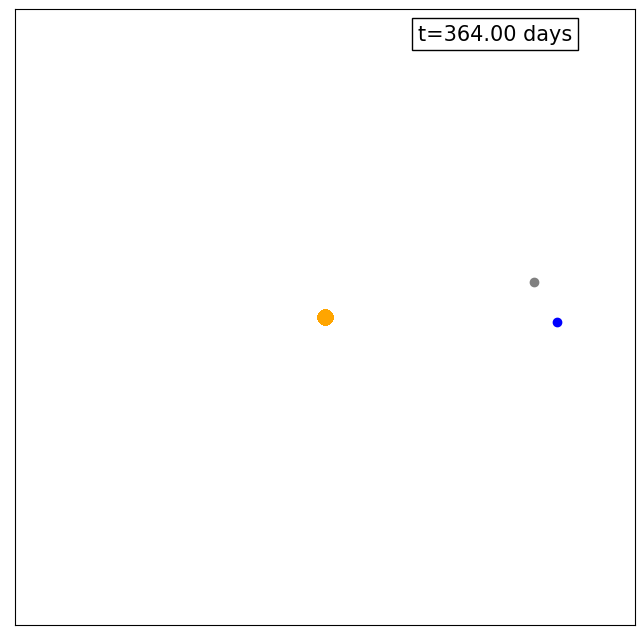

In [60]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
import numpy as np


class OOPlanet:
    def __init__(self, radius, angularfreq):
        self.radius = radius
        self.angularfreq = angularfreq
        
    def getangularfreq(self):
        return self.angularfreq
    
    def getradius(self):
        return self.radius
        
    def getX(self, time):
        return self.radius * np.cos(self.angularfreq * time)
    
    def getY(self, time):
        return self.radius * np.sin(self.angularfreq * time)
    
    def position(self, time):
        return (self.getX(time), self.getY(time))
        
    def planetevolve(self, start, end, timestep):
        tinterval = end - start
        resolution = tinterval // timestep
        xarray = []
        yarray = []
        t = start
        for i in range(resolution):
            xarray.append(self.position(t)[0])
            yarray.append(self.position(t)[1])
            t = t + timestep
        return [xarray, yarray]

class OOPmoon(OOPlanet): #subclass of OOPlanet
    def __init__(self, radius, angularfreq, radius2, angularfreq2): #radius2 and angularfreq2 are relative to earth
        super().__init__(radius, angularfreq)
        self.radius2 = radius2
        self.angularfreq2 = angularfreq2
    
    def getradius2(self):
        return self.radius2
    
    def getangularfreq2(self):
        return self.angularfreq2
    
    def getX(self, time):
        return super().getX(time) + (self.radius2 * np.cos(self.angularfreq2 * time))
    
    def getY(self, time):
        return super().getY(time) + (self.radius2 * np.sin(self.angularfreq2 * time))
                        
    def position(self, time):
        return (self.getX(time), self.getY(time))
    
    def moonevolve(self, start, end, timestep):
        tinterval = end - start
        resolution = tinterval // timestep
        xarray = []
        yarray = []
        t = start
        for i in range(resolution):
            xarray.append(self.position(t)[0])
            yarray.append(self.position(t)[1])
            t = t + timestep
        return [xarray, yarray]


# Initialising the 3 planets. We only create an instance of OOPlanet for Earth and another instance of OOPmoon for
# the moon. We do not need to initialise the sun because we are taking the origin to be sun and we the observer's
# frame of reference IS the sun's reference frame
earthsun_radius = 15
earthmoon_radius = 3

earth = OOPlanet(earthsun_radius, (2*np.pi)/365.25)
moon = OOPmoon(earthsun_radius, (2*np.pi)/365.25, earthmoon_radius, (2*np.pi)/27.3)

xe, ye = earth.planetevolve(0, 365, 1)[0], earth.planetevolve(0, 365, 1)[1]

xm, ym = moon.moonevolve(0, 365, 1)[0], moon.moonevolve(0, 365, 1)[1]

# plt.plot(xm, ym, '.', color = 'grey')
# plt.plot(xe, ye, '.', color = 'blue')


# Animating the plot
fig, ax = plt.subplots(1, 1, figsize = (8,8))
movingmoon, = plt.plot([], [], 'o', color = 'grey')
movingearth, = plt.plot([], [], 'o', color = 'blue')
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
plt.xticks([], [])
plt.yticks([], [])

def animate(frame):
    plt.plot(0,0 ,'o', color = 'orange', markersize = 10)
    movingmoon.set_data(xm[frame], ym[frame])
    movingearth.set_data(xe[frame], ye[frame])
    time_text.set_text('t={:.2f} days'.format(frame))
    
ani = animation.FuncAnimation(fig, animate, frames = 365, interval = 1)
# ani.save('animation2.gif', writer = 'pillow', fps=30, dpi = 120)
    

Earth-Moon orbital radius: $380 \times 10^3$ km

Earth-Moon orbital period: $27.3$ days

Earth-Sun orbital radius: $(149 \times 10^3) \times 10^3$ km

Earth-Sun orbital period: $365.25$ days

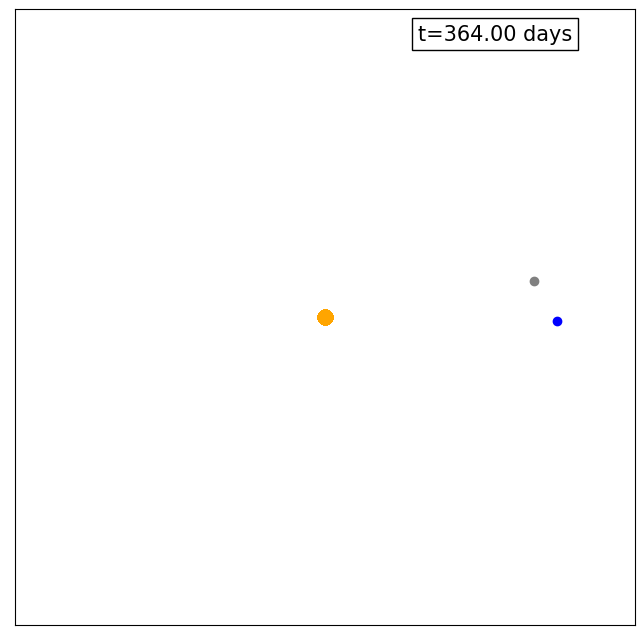